In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Подготовка данных о перевозках грузов

In [2]:
"""
Из файла CSV считываются данные и помещаются в объект DataFrame.
Все заголовки столбцов переименовываются с русского на английский.
"""
traffic = pd.read_csv(
    'task19.csv',
    delimiter=';',
    encoding='cp1251'
).rename(columns={
    'Дата': 'date',
    'Пункт отправления': 'departure',
    'Пункт назначения': 'destination',
    'Расстояние': 'distance',
    'Расход бензина': 'consumption',
    'Масса груза': 'weight'
})
print(traffic.head(3))

        date departure destination  distance  consumption  weight
0  1 октября     Липки     Березки       432           63     770
1  1 октября   Орехово       Дубки       121           17     670
2  1 октября    Осинки      Вязово       333           47     830


# Распределение перевозок по дням

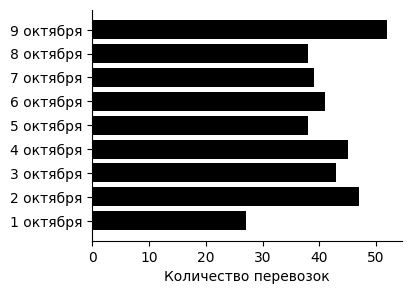

In [ ]:
"""
Записи группируются по дате таким образом, что создаётся
новый объект Series, индексами которого являются даты,
а значениями количество перевозок в конкретные даты.
"""
traffic_gbd = traffic.groupby('date').size()

""" Задаётся размер диаграммы. """
plt.figure(figsize=(4, 3))

"""
Создаётся гистограмма функцией barh библиотеки Matplotlib.
Функции передаются три агрумента: подписи линий гистограммы,
а именно даты, значения, задающие длину линий гистограммы,
а именно количество перевозок в конкретную дату, и цвет линий.
"""
plt.barh(
    traffic_gbd.index,
    traffic_gbd.values,
    color='black'
)

""" Скрываются верхняя и правая полоски сетки. """
plt.gca().spines[['top', 'right',]].set_visible(False)

""" Добавляется подпись горизонтальной оси гистограммы. """
plt.xlabel('Количество перевозок')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()

# Зависимость расхода топлива от расстояния

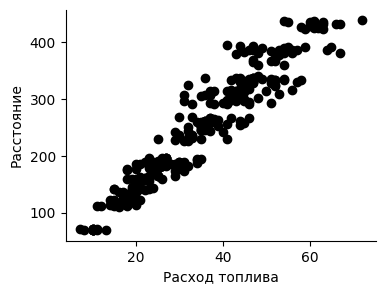

In [ ]:
""" Задаётся размер диаграммы. """
plt.figure(figsize=(4, 3))

"""
Создаётся точечная диаграмма функцией scatter библиотеки Matplotlib.
Функции передаются три агрумента: абсциссы, ординаты и цвет точек.
"""
plt.scatter(
    traffic.consumption,
    traffic.distance,
    color='black'
)

""" Скрываются верхняя и правая полоски сетки. """
plt.gca().spines[['top', 'right',]].set_visible(False)

""" Добавляется подпись горизонтальной оси гистограммы. """
plt.xlabel('Расход топлива')

""" Добавляется подпись вертикальной оси гистограммы. """
plt.ylabel('Расстояние')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()

# Зависимость расхода топлива от массы груза

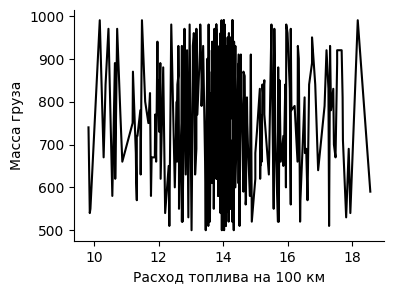

In [ ]:
"""
Добавляется столбец average,
содержащий расход топлива на 100 км.
"""
traffic['consumption100'] = round(
    traffic.consumption / traffic.distance * 100, 2
)

""" Записи сортируются по добавленному признаку. """
traffic = traffic.sort_values(by='consumption100')

""" Задаётся размер графика. """
plt.figure(figsize=(4, 3))

"""
Создаётся график функцией plot библиотеки Matplotlib.
Функции передаются три агрумента: абсциссы, ординаты и цвет точек.
"""
plt.plot(
    traffic.consumption100,
    traffic.weight,
    color='black'
)

""" Скрываются верхняя и правая полоски сетки. """
plt.gca().spines[['top', 'right',]].set_visible(False)

""" Добавляется подпись горизонтальной оси гистограммы. """
plt.xlabel('Расход топлива на 100 км')

""" Добавляется подпись вертикальной оси гистограммы. """
plt.ylabel('Масса груза')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()